In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


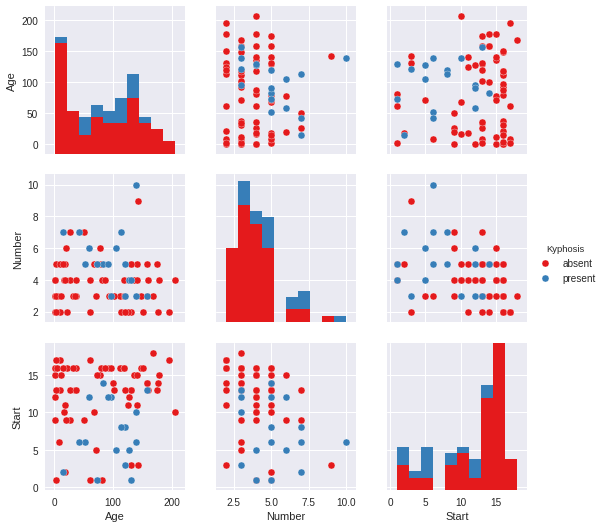

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.84      0.89      0.86        18
    present       0.67      0.57      0.62         7

avg / total       0.79      0.80      0.80        25



In [14]:
print(confusion_matrix(y_test,predictions))

[[16  2]
 [ 3  4]]


In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [33]:
rfc_pred = rfc.predict(X_test)

In [34]:
print(confusion_matrix(y_test,rfc_pred))

[[17  1]
 [ 3  4]]


In [35]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

     absent       0.85      0.94      0.89        18
    present       0.80      0.57      0.67         7

avg / total       0.84      0.84      0.83        25

